## Orthogonality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# custom theme
plt.style.use('rose-pine-moon')
# plt.style.use('dark_background')
%matplotlib inline

Follows (Introduction to Linear Algebra, ch4): https://math.mit.edu/~gs/linearalgebra/ 

### Projections

#### Intuition

We try to project a vector $u$ onto z-axis and into xy plane

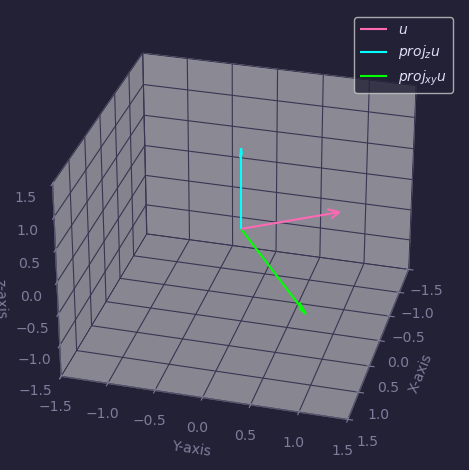

In [2]:
u = np.array([1.2, 1.3, 1.4])
p1 = np.diag([0, 0, 0.9])
p2 = np.diag([1.2, 0.8, 0.0])
u_orth = p1 @ u
u_proj = p2 @ u
colors= ['hotpink', 'cyan', 'lime']
labels = [r'$u$', r'$proj_{z} u$', r'$proj_{xy} u$']
fig, ax = plt.subplots(1, 1, tight_layout = True, subplot_kw=dict(projection='3d'))
plt.setp(ax, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), zlim=(-1.5, 1.5))
for n, i in enumerate((u, u_orth, u_proj)):
    ax.quiver(0,0,0, i[0], i[1], i[2], arrow_length_ratio=0.1, color = colors[n], label=labels[n])

ax.view_init(azim=15, elev=30)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('z-axis')
ax.legend();

Side Note:
- The linea and plane are orthogonal **complements**. Their dimensions add to 3. Every vector u in the whole space is the sum of its parts in the two subspaces.

#### Projection onto line

The closest point in a subspace is at the perpendicular line from the vector to the subspace. Let the subspace be spanned by $a$ and $a\hat{x}$ be projection of $b$ in $a$. Then the perpendicular component is $e=b-a$. Since, $a$ is perpendicular to $e$, so:
$$ a \cdot (b - a\hat{x}) = 0 \\[1em]
\Rightarrow a^T b - a^T a \hat{x} = 0 \\[1em]
\Rightarrow  \hat{x} = \frac{a^T b}{a^T a}$$
And projection $p$ is $p\hat{x} = \frac{a^T b}{a^T a} a$

In [3]:
b = np.array([[2], [1]])
a = np.array([[2], [4]])
x_hat = (b.T @ a) / (a.T @ a)
p = a * x_hat
e = b - p

print(
    f'x_hat : {x_hat}\n',
    f'\nprojection of b onto a:\n{p}\n',
    f'\ncomponent of b perpendicular to a:\n{e}'
)

x_hat : [[0.4]]
 
projection of b onto a:
[[0.8]
 [1.6]]
 
component of b perpendicular to a:
[[ 1.2]
 [-0.6]]


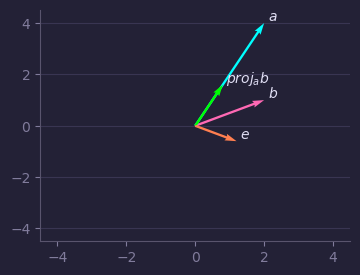

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plt.setp(ax, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5))
colors = ['hotpink', 'cyan', 'lime', 'coral']
labels = ['$b$','$a$','$proj_a b$', r'$e$']
for n, i in enumerate((b, a, p, e)):
    ax.quiver(0, 0, i[0], i[1], angles='xy',  scale=1, scale_units='xy', color=colors[n])
    ax.text(i[0] + 0.1, i[1] + 0.1, s=labels[n])

Projection matrix $p = Pb = a\hat{x} = a \frac{a^Tb}{a^Ta} \Rightarrow p  = \frac{aa^T}{a^Ta}$

In [5]:
P = (a@a.T)/(a.T@a)
x = np.array([[2.3],[1.5]])
print(
    f'projection matrix for p :\n{P}',
    f'\n\nPx :\n{P@x}'
    )

projection matrix for p :
[[0.2 0.4]
 [0.4 0.8]] 

Px :
[[1.06]
 [2.12]]


Note any for any vector x, Projection matrix projects the vector in subspace spanned by a.

#### Projection onto a subspace

Let **n-indpendent vectors** $a_1,\dots,a_n$ span the subspace $\mathbb{R}^m$.  Let this vectors be columns of matrix A. Similar to last case the closest projection of b is $p = A\hat{x}$. Again the error is $e=b-A\hat{x}$. We know e and A are perpendicular, therefore:
$$A\cdot{b-A\hat{x}} = 0\\[1em]
\Rightarrow A^TA\hat{x} = A^Tb \\[1em]
\Rightarrow \hat{x} = (A^TA)^{-1}A^Tb
$$
The **projection** is $p = A\hat{x} = A (A^TA)^{-1}A^Tb$ and <br> The **projection matrix** is $P = A (A^TA)^{-1}A^T$
<br><br>Note, often the matrix A is rectangular and does not have an inverse. And if A has dependent columns than $A^TA$ will also not be invertible.

In [6]:
A = np.array([[1,0],[1,1],[1,2]])
b = np.array([[6],[0],[0]])

x_hat = np.linalg.inv(A.T@A)@A.T@b
p = A @ x_hat
e = b - p
P = A@np.linalg.inv(A.T@A)@A.T
print(
    f'projection in subspace spanned by A:\n{p}\n',
    f'\nerror:\n{e}\n'
    f'\nProjection matrix: \n{P}'
)

projection in subspace spanned by A:
[[ 5.]
 [ 2.]
 [-1.]]
 
error:
[[ 1.]
 [-2.]
 [ 1.]]

Projection matrix: 
[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]


When A has independent columns, $A^T A$ is a square, symmetric and invertible matrix.

### Least Square Approximations

It often happens that $Ax = b$ has no solution. Most of the time we have more equation than unknowns, i.e. more rows in A than columns. <br>
In other words error $e = b-Ax$ never reaches zero. When e is as small as possible, $\hat{x}$ is a *least squares solution*.

##### Fitting a straight line

Let $X = (x_0,\dots x_n)$ and $Y = (y_0,\dots,y_n)$ and let the equation of line be $Y = MX + b$ . To reperesent in form of $AX=b$, the matrices becomes:
$$Ax =
\begin{bmatrix*}
1 & x_1 \\
\vdots & \vdots \\
1& x_n
\end{bmatrix*}
\begin{bmatrix*}
b\\
m
\end{bmatrix*} =
\begin{bmatrix*}
y_1 \\
\vdots\\
y_n 
\end{bmatrix*}
$$

In [7]:
u = np.array([[0,6],[1,0],[2,0]])
A = np.stack((np.ones(u.shape[0]), u[:,0]), axis=1)
x = np.linalg.inv(A.T @ A) @ A.T @ u[:,1]

f = np.polynomial.Polynomial(x)
print(f'error:\n{u[:,1]-A@x}')

error:
[ 1. -2.  1.]


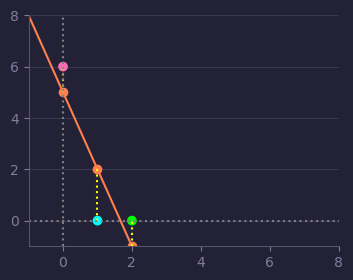

In [8]:
t = np.arange(-1, 2.1, 0.1)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plt.setp(ax, xlim=(-1,8), ylim=(-1, 8))
colors = ['hotpink', 'cyan', 'lime', 'coral']
ax.scatter(u[:,0], u[:,1], color = colors[:-1]) 
ax.plot(t, f(t), color=colors[-1])
ax.scatter(u[:,0], f(u[:,0]), color='coral', marker='o')
for i in range(3):
    ax.plot([u[i, 0], u[i, 0]], [f(u[i, 0]), u[i,1]], color='yellow', ls=':')
ax.axhline(0, color='grey', ls=':')  
ax.axvline(0, color='grey', ls=':');   

Observations:
- The least-squares solution minimizes the sum of the squares of the entries of vector $b - A\hat{x}$
- $b$ is the actual y-values of our data, while $A\hat{x}$ is the y-values on the line. The distance between y-coordinates is equal to $b - A\hat{x}$, i.e. $e_1,\dots , e_n$

##### Orthogonal Matrices and Least Squares

In [9]:
u = np.array([[-2,1],[0,2],[2,4]])
A = np.stack((np.ones(u.shape[0]), u[:,0]), axis=1)
print(f'A^T.A:\n{A.T @ A}')

A^T.A:
[[3. 0.]
 [0. 8.]]


Note that if A has orthogonal columns then $A^TA$ is a diagonal matrix and it is way easier to solve the equation $A^TA\hat{x} = A^Tb$. <br>
Orthogonal colums are so helpful that is worth shifting the orignal x values by subtracting there mean.

In [10]:
u = np.array([[1,1],[3,2],[5,4]])
x = u[:,0] - np.mean(u[:,0])
A = np.stack((np.ones(u.shape[0]), x), axis=1)
print(f'A:\b{np.stack((np.ones(u.shape[0]), u[:,0]), axis=1)}\nA^T.A:\n{A.T @ A}')

A[[1. 1.]
 [1. 3.]
 [1. 5.]]
A^T.A:
[[3. 0.]
 [0. 8.]]


Note that A did not have orthogonal columns orignally but subtracting there mean gave us orthogonal columns. So the new equation of line is $y = M(x-\bar{x}) + b$

##### Fitting a parabola

Let $X = (x_0,\dots x_n)$ and $Y = (y_0,\dots,y_n)$ and let the equation of parabola be $Y = DX^2 + CX + B$ . To reperesent in form of $AX=b$, the matrices becomes:
$$Ax =
\begin{bmatrix*}
1 & x_1^2 & x_1  \\
\vdots & \vdots & \vdots\\
1& x_n^2 & x_1 
\end{bmatrix*}
\begin{bmatrix*}
B\\
C \\
D
\end{bmatrix*} =
\begin{bmatrix*}
y_1 \\
\vdots\\
y_n 
\end{bmatrix*}
$$

In [11]:
u = np.array([[0,6], [1,0], [2,0]])
A = np.stack((
    np.ones(u.shape[0]),u[:,0],np.power(u[:,0],2)
), axis=1)
b = u[:,1] 
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b

print(
    f'least-squares solution :\n{x_hat}',
    f'\n\nprojection of b in column space of A :\n{A @ x_hat}', 
    f'\n\ndistance between b and its projection in A:\n{np.linalg.norm(A@x_hat - u[:,1])}'
)

least-squares solution :
[ 6. -9.  3.] 

projection of b in column space of A :
[6. 0. 0.] 

distance between b and its projection in A:
0.0


In [12]:
print(f'inverse of matrix:\n{np.linalg.inv(A)}')

inverse of matrix:
[[ 1.   0.   0. ]
 [-1.5  2.  -0.5]
 [ 0.5 -1.   0.5]]


Note in the above case the matrix is invertible and has three columns, which span whole space $\mathbb{R}^3$ and we did not need to solve using the formulation $A^TA\hat{x} =  A^Tb$. We could have solved using $Ax = b$ and the error will be 0.

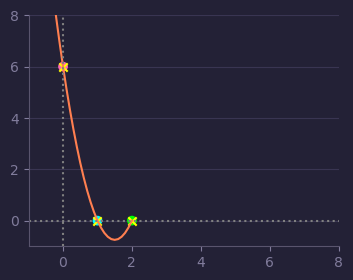

In [13]:
f = np.polynomial.Polynomial(x_hat)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plt.setp(ax, xlim=(-1,8), ylim=(-1, 8))
colors = ['hotpink', 'cyan', 'lime', 'coral']
ax.scatter(u[:,0], u[:,1], color = colors[:-1]) 
ax.plot(t, f(t), color=colors[-1])
ax.scatter(u[:,0], f(u[:,0]), color='yellow', marker='x')
for i in range(3):
    ax.plot([u[i, 0], u[i, 0]], [f(u[i, 0]), u[i,1]], color='yellow', ls=':')
ax.axhline(0, color='grey', ls=':')  
ax.axvline(0, color='grey', ls=':');

### Orthonormal Bases

The vectors $q_1, \dots , q_n$ are orthogonal when their dot products $q_i \cdot q_j $ are zero. If divided by their lengths (to get unit vectors) then the basis is called orthonormal. A matrix with orthonormal columns is assigned the special letter $Q$.
<br>Benifits:
- $Q$ with orthonormal satisfy $Q^TQ = I$.
- If $Q$ is square $Q^T = Q^{-1}$ and the matrix is called orthogonal matrix.
- Least Squares solution to $Qx = b$ is $\hat{x}=Q^Tb$. Projection of $b: p = QQ^T = Pb$.

#### Examples of Orthogonal Matrices

##### Rotation

In [14]:
def rot_mat(theta):
    theta = theta * np.pi / 180 
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

Q = rot_mat(30)
print(
    f'Q:\n{Q}',
    f'\n\nQT:\n{Q.T}',
    f'\n\nQ^-1:\n{np.linalg.inv(Q)}'
    f'\n\nQT . Q:\n{Q.T @ Q}'
)

Q:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]] 

QT:
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]] 

Q^-1:
[[ 0.8660254  0.5      ]
 [-0.5        0.8660254]]

QT . Q:
[[1. 0.]
 [0. 1.]]


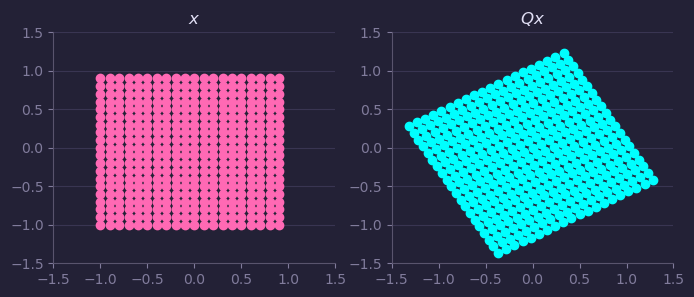

In [15]:
x, y = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
u = np.stack((x.flatten(), y.flatten()))
y = Q @ u
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
plt.setp(axs, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
colors = ['hotpink', 'cyan']
titles = [r'$x$', r'$Qx$']
for n, i in enumerate((u, y)):
    axs[n].scatter(i[0, :], i[1, :], color = colors[n])
    axs[n].set_title(titles[n])

##### Permutation

This matrices change order of x, y, z (standard basis vectors).

In [16]:
Q = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])

print(
    f'Q:\n{Q}',
    f'\n\nQT:\n{Q.T}',
    f'\n\nQ^-1:\n{np.linalg.inv(Q)}'
    f'\n\nQT . Q:\n{Q.T @ Q}'
)

Q:
[[0 0 1]
 [1 0 0]
 [0 1 0]] 

QT:
[[0 1 0]
 [0 0 1]
 [1 0 0]] 

Q^-1:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

QT . Q:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


For 2-d

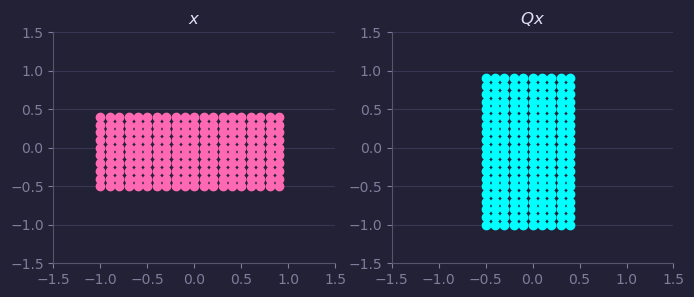

In [17]:
Q = np.array([[0, 1], [1, 0]])
x, y = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-0.5, 0.5, 0.1))
u = np.stack((x.flatten(), y.flatten()))

y = Q @ u
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
plt.setp(axs, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
colors = ['hotpink', 'cyan']
titles = [r'$x$', r'$Qx$']
for n, i in enumerate((u, y)):
    axs[n].scatter(i[0, :], i[1, :], color = colors[n])
    axs[n].set_title(titles[n])

This might seem like rotation by 90 degrees by in reality it is more like filiping and the rotation.

##### Reflection

If u in any unit vector, set $Q = I - 2uu^T$, then Q is orthogonal and reflects a vector in direction of u.

In [18]:
u = np.array([[-1/2**0.5], [1/2**0.5]])
Q = np.eye(2) - 2 * u @ u.T
Q

array([[2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16]])

In [19]:
v = np.array([[0.75], [0.25]])
y = Q @ v

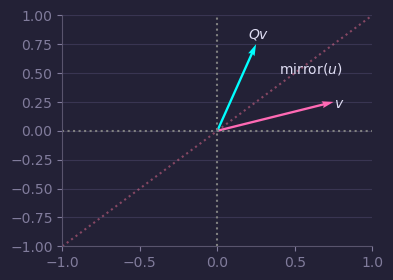

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.setp(ax, xlim=(-1, 1), ylim=(-1, 1))
ax.plot(np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1), alpha=0.5, ls=':' )
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=colors[0])
ax.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color=colors[1])
ax.text(0.75, 0.2, r'$v$')
ax.text(0.2, 0.8, r'$Qv$')
ax.text(0.4, 0.5, r'mirror($u$)')
ax.axhline(0, color='grey', ls=':')
ax.axvline(0, color='grey', ls=':');

One important obeservation that can be made in all these examples is that ***"applying an orthogonal transformation does not change the lengths of orignal vector"***.

#### Gram-Schmidt Process

Recall orthogonal matrices are good from computation for the following reasons:
- They do not change the magnitude of vectors, i.e. numbers can never grow too large.
- Least Square solution $A^TA\hat{x} = A^Tb$ simplifies to $\hat{x}=Qb$. This solution does not require any inverse operation.
- $Q^TQ = I$, hence there is no coupling. The correlation matrix simplifies to identity matrix.
- If $Q$ is square, the subspace is the whole space and projection of $b$ in $Q$ is $b$ itself. In other words every $b=QQ^Tb$ is the sum of its components along the *q's*.

Orthogonal matrices being good to deal with, *"Gram-Schmidt" process aims at creating orthonormal vectors out of non-orthogonal independent vectors.*
<br>Step-wise Process (for $\mathbb{R}^3$):
1. Start  with three independent vectors *a,b,c*. We intend to construct three orthogonal vectors *A,B,C*. At end we divide by there magnitude to get $q_1=A/\lVert A\rVert, q_2=B/\lVert B\rVert,q_3=C/\lVert C\rVert$ orthonormal vectors.
2. **First Gram-Schmidt step**: Begin by choosing **A=a.** Then net direction *B* is selected perpendicular to *A*. This can be easily obtained by subtracting the projection component alon *A* from *b*. Mathematically:
$$ B = b - \frac{A^Tb}{A^TA}A$$
3. **Next Gram-Schmidt Step**: The third direction starts with *c*. Since *c* is indepdent from *a* and *b*, it cannot be expressed as combination of *A* and *B*. But most likely it is not perpendicular to *A* and *B*, so similar to above step we get the perpendicular component.
$$C = c - \frac{A^Tc}{A^TA}A -\frac{B^Tc}{B^TB}B.$$
4. The above steps are repeated for higher order of subspaces.

In [21]:
u = np.array([[1,2,3],[-1,0,-3],[0,-2,3]])
a, b, c = np.split(u, 3, axis=-1)
A = a

# First step
B = b - (A.T@b)/(A.T@A) * A

# Next Step
C = c - (A.T@c)/(A.T@A) * A - (B.T@c)/(B.T@B) * B

Q = np.concatenate((A,B,C),axis=1)
Q = Q / np.linalg.norm(Q, axis=0)


print(
    f'Independent vectors(columns): \n{u}\n'
    f'\nFirst Gram-Schmidt step result (B):\n{B}\n',
    f'\nNext Gram-Schmidt step result (C):\n{C}\n',
    f'\nResulting orthonormal vectors (columns):\n{Q}\n',
)

Independent vectors(columns): 
[[ 1  2  3]
 [-1  0 -3]
 [ 0 -2  3]]

First Gram-Schmidt step result (B):
[[ 1.]
 [ 1.]
 [-2.]]
 
Next Gram-Schmidt step result (C):
[[1.]
 [1.]
 [1.]]
 
Resulting orthonormal vectors (columns):
[[ 0.70710678  0.40824829  0.57735027]
 [-0.70710678  0.40824829  0.57735027]
 [ 0.         -0.81649658  0.57735027]]



#### QR Factorization

In last section we saw that by applying **Gram-Schmidt** process on a matrix *A* with independent column vectors, we obtain a matrix *Q* with orthonormal column vectors. Then an upper traingular matrix relates them both by equation $A=QR$ such that *R* is an **upper triangular matrix** because the later *q's* are orthogonal to earlier *a's*.
<br><br>Simplification of least squares by subsituting A = QR.
$$A^TA \hat{x} = A^TB \\[1em]
\Rightarrow (QR^T)QR \hat{x} = (QR)^Tb \\[1em]
\Rightarrow R^TQ^TQR \hat{x} = R^TQ^Tb \\[1em]
\Rightarrow R^T R \hat{x} = R^TQ^Tb \\[1em]
\Rightarrow \hat{x} = R^{-1} Q^Tb \\[1em]
$$

In [22]:
R = Q.T @ u
Q_, R_  = np.linalg.qr(u)

print(
    f'mannualy:\nQ:\n{Q}\nR:\n{R}'
    f'\n\nnp.linalg.qr (Householder reflections):\n:\nQ:\n{Q_}\nR:\n{R_}'
    )

mannualy:
Q:
[[ 0.70710678  0.40824829  0.57735027]
 [-0.70710678  0.40824829  0.57735027]
 [ 0.         -0.81649658  0.57735027]]
R:
[[ 1.41421356  1.41421356  4.24264069]
 [ 0.          2.44948974 -2.44948974]
 [ 0.          0.          1.73205081]]

np.linalg.qr (Householder reflections):
:
Q:
[[-0.70710678 -0.40824829  0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [-0.          0.81649658  0.57735027]]
R:
[[-1.41421356 -1.41421356 -4.24264069]
 [ 0.         -2.44948974  2.44948974]
 [ 0.          0.          1.73205081]]


In [23]:
print(
    f'Verifications:',
    f'\nMannual: QR == A : {np.allclose(np.round(Q @ R),u)}',
    f'\nnp.linalg.qr: Q_R_ == A : {np.allclose(np.round(Q_ @ R_),u)}'
)

Verifications: 
Mannual: QR == A : True 
np.linalg.qr: Q_R_ == A : True


`Note:` Mannual computation result matches the textbook answer, but as mentioned the qr factorization is done differently in LAPACK (using Householder reflections) and therefore results vary. Both decompositions till combine to give the orignal matrix.